In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
data = pd.read_csv("C:/Users/ncmia/OneDrive/Desktop/Students_Grading_Dataset.csv")
data.head()

,First_Name,Last_Name,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Total_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Omar,Williams,Female,22,Engineering,52.29,55.03,57.82,56.09,6.2,No,Yes,High School,Medium,5,4.7
1,Maria,Brown,Male,18,Engineering,97.27,97.23,45.80,50.64,19.0,No,Yes,NaN,Medium,4,9.0
2,Ahmed,Jones,Male,24,Business,57.19,67.05,93.68,70.30,20.7,No,Yes,Master's,Low,6,6.2
3,Omar,Williams,Female,24,Mathematics,95.15,47.79,80.63,61.63,24.8,Yes,Yes,High School,High,3,6.7
4,John,Smith,Female,23,CS,54.18,46.59,78.89,66.13,15.4,Yes,Yes,High School,High,2,7.1


In [3]:
print("\nDataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   First_Name                  499 non-null    object 
 1   Last_Name                   499 non-null    object 
 2   Gender                      499 non-null    object 
 3   Age                         499 non-null    int64  
 4   Department                  499 non-null    object 
 5   Attendance (%)              457 non-null    float64
 6   Midterm_Score               499 non-null    float64
 7   Final_Score                 499 non-null    float64
 8   Total_Score                 499 non-null    float64
 9   Study_Hours_per_Week        499 non-null    float64
 10  Extracurricular_Activities  499 non-null    object 
 11  Internet_Access_at_Home     499 non-null    object 
 12  Parent_Education_Level      309 non-null    object 
 13  Family_Income_Level 

In [4]:
categorical_columns = data.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  

In [5]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
First_Name                     0
Last_Name                      0
Gender                         0
Age                            0
Department                     0
Attendance (%)                42
Midterm_Score                  0
Final_Score                    0
Total_Score                    0
Study_Hours_per_Week           0
Extracurricular_Activities     0
Internet_Access_at_Home        0
Parent_Education_Level         0
Family_Income_Level            0
Stress_Level (1-10)            0
Sleep_Hours_per_Night          0
dtype: int64


In [6]:
numerical_columns = ['Attendance (%)', 'Midterm_Score', 'Final_Score','Total_Score','Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night', 'Age']

mean_values = data[numerical_columns].median()

data[numerical_columns] = data[numerical_columns].fillna(mean_values)
print(data.isnull().sum())

First_Name                    0
Last_Name                     0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Total_Score                   0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64


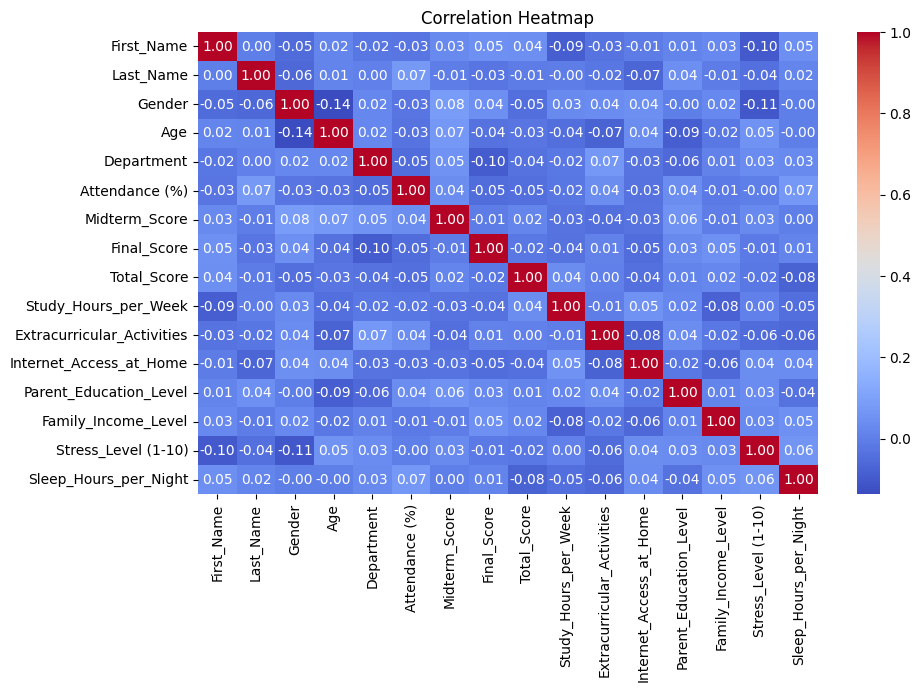

In [7]:
data = pd.get_dummies(data, drop_first=True) # One-hot encoding for categorical variables
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [8]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(data)

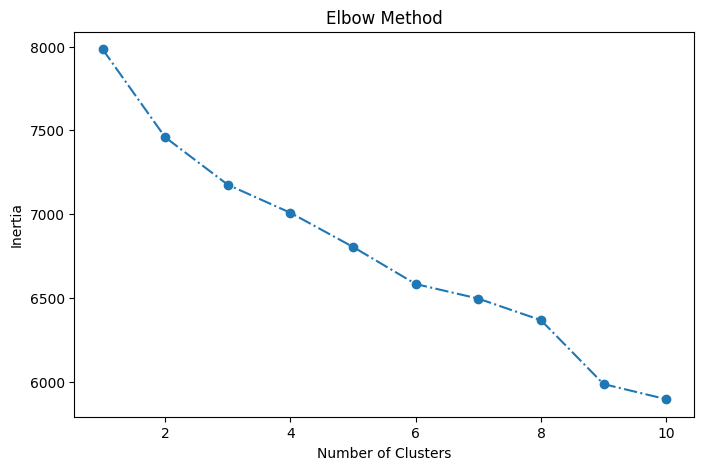

In [28]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-.')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_scaled)
data['Cluster'] = clusters

In [11]:
score = silhouette_score(df_scaled, clusters)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.06


C:\Users\ncmia\AppData\Local\Temp\ipykernel_19544\1638487851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data, palette='viridis')


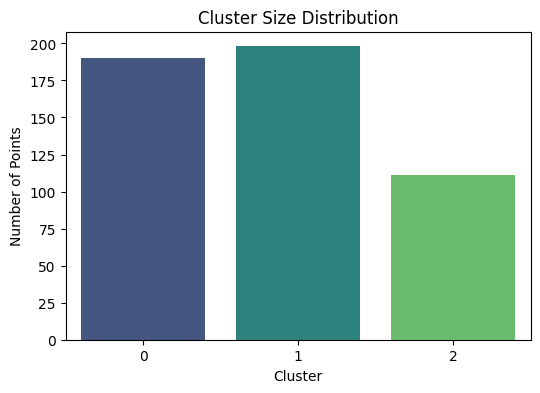

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Cluster', data=data, palette='viridis')
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.show()

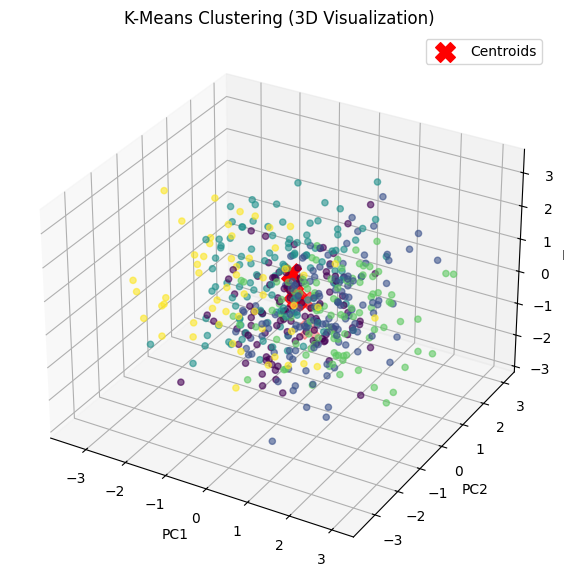

In [ ]:
from sklearn.decomposition import PCA

K = 5

kmeans = KMeans(n_clusters=K, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(df_scaled)
# Reduce dimensions to 3D using PCA
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_scaled)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca_3d[:, 0], df_pca_3d[:, 1], df_pca_3d[:, 2], c=cluster_labels, cmap='viridis', alpha=0.6)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='X', s=200, label='Centroids')

ax.set_title("K-Means Clustering (3D Visualization)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend()
plt.show()


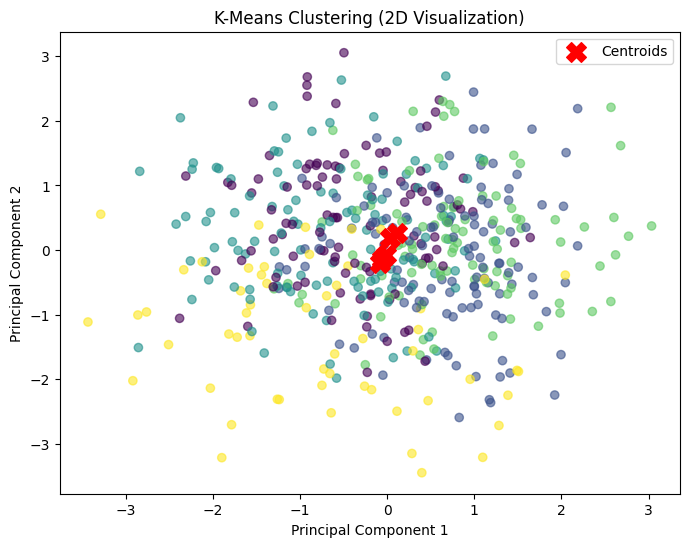

In [14]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title("K-Means Clustering (2D Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

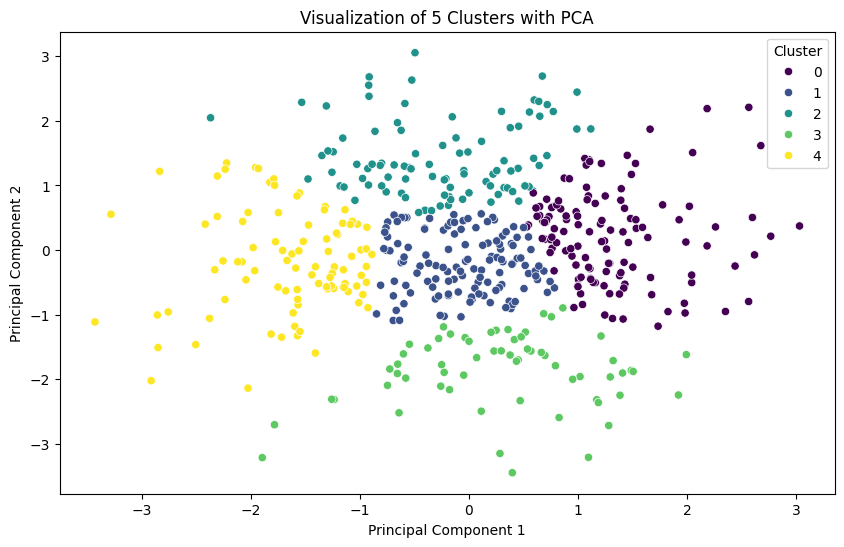

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

kmeans = KMeans(n_clusters=K, random_state=42)
clusters = kmeans.fit_predict(df_pca)
data['Cluster'] = clusters

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=data['Cluster'], palette='viridis')
plt.title(f'Visualization of {K} Clusters with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [16]:
cluster_counts = data['Cluster'].value_counts()
print(cluster_counts)

Cluster
1    126
0    125
2     94
4     91
3     63
Name: count, dtype: int64


In [17]:
data.head(20)

,First_Name,Last_Name,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Total_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Cluster
0,6,5,0,22,2,52.29,55.03,57.82,56.09,6.2,0,1,1,2,5,4.7,0
1,5,0,1,18,2,97.27,97.23,45.80,50.64,19.0,0,1,4,2,4,9.0,1
2,0,3,1,24,0,57.19,67.05,93.68,70.30,20.7,0,1,2,1,6,6.2,2
3,6,5,0,24,3,95.15,47.79,80.63,61.63,24.8,1,1,1,0,3,6.7,0
4,3,4,0,23,1,54.18,46.59,78.89,66.13,15.4,1,1,1,0,2,7.1,1
5,4,0,1,21,2,75.25,78.85,43.53,62.08,8.5,1,1,3,0,1,5.0,2
6,0,3,1,24,0,57.60,66.26,89.07,83.21,21.3,0,1,4,1,5,6.4,2
7,0,4,1,19,2,51.91,45.67,73.96,81.93,27.3,1,0,4,2,4,4.3,4
8,6,4,0,21,1,85.97,84.42,90.87,95.62,8.0,0,0,0,1,9,8.8,3
9,7,4,0,22,2,64.01,87.96,98.47,84.99,9.6,0,1,4,2,10,6.4,3
